<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework5_part1_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5.1 (31 points)

**Learning objectives:**

In this assignment, we will become familiar with PyTorch, one of the most popular libraries for machine learning.  We will explore:

*   PyTorch syntax and usage
*   Solving the XOR problem with PyTorch

---

## Part 0

This assignment will provide an introduction to PyTorch. PyTorch is an open source machine learning framework that allows you to write your own neural networks and optimize them efficiently. We choose to use PyTorch because it is well established, has a huge developer community (originally developed by Facebook), is very flexible and especially used in research.

Meanwhile, TensorFlow (developed by Google) is usually known for being a production-grade deep learning library.

---

First, load the same libraries that we used in previous homeworks.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)

Now, import **Pytorch**.  The package is called `torch`.

*   `import torch`

As always, now is also a good time to set the default font size to 16.

Finally, let's set the random seed for `torch` so that our code's output is the same every time we run it.

*   `torch.manual_seed(1)`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

plt.rcParams.update({'font.size': 16})
torch.manual_seed(1);

---

### Part 1  (1 point)

**Tensors** are the PyTorch equivalent of Numpy arrays, but also have support for GPU acceleration (more on that later). The name "tensor" really just refers to higher-dimensional matrices (3-D, 4-D, etc.).

Most common functions you know from numpy can be used on tensors as well. Since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back).

Let's first start by looking at different ways of creating a tensor. There are **many** possible options.

*   Create a 3-D tensor called `xtensor` of dimensions 2x3x4 using `torch.Tensor`.  This allocates memory for the desired tensor, but reuses any values that might already be in memory.  Print `xtensor`.
*   Create a tensor that is the same size but contains zeros using `torch.zeros`.  Call it `xzeros` and print it.
*   Create and print similar tensors using `torch.ones` (called `xones`), `torch.rand` (called `xrand`), and `torch.randn` (called `xrandn`).
*   Create and print a 1-D tensor using `torch.arange` (called `xarange`) containing the integers 1 through 10.  


In [4]:
xtensor = torch.Tensor(2, 3, 4)
print(xtensor)
xzeros= torch.zeros(2,3,4)
print(xzeros)
xones= torch.ones(2,3,4)
print(xones)
xrand = torch.rand(2,3,4)
print(xrand)
xrandn=torch.randn(2,3,4)
print(xrandn)
xarange = torch.arange(1,11,1)
print(xarange)

tensor([[[2.8026e-45, 0.0000e+00, 1.6126e+38, 3.3188e-41],
         [1.6125e+38, 3.3188e-41, 1.6125e+38, 3.3188e-41],
         [4.2039e-45, 0.0000e+00, 1.6126e+38, 3.3188e-41]],

        [[1.6124e+38, 3.3188e-41, 1.6125e+38, 3.3188e-41],
         [1.6125e+38, 3.3188e-41, 2.3822e-44, 3.3188e-41],
         [4.1472e+34, 3.3188e-41, 1.6126e+38, 3.3188e-41]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[0.7576, 0.2793, 0.4031, 0.7347],
         [0.0293, 0.7999, 0.3971, 0.7544],
         [0.5695, 0.4388, 0.6387, 0.5247]],

        [[0.6826, 0.3051, 0.4635, 0.4550],
         [0.5725, 0.4980, 0.9371, 0.6556],
         [0.3138, 0.1980, 0.4162, 0.2843]]])
tensor([[[ 0.4391,  1.1712,  1.7674, -0.0954],
 

---
## Part 2 (1 point)

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`.
*   Create a 2x2 numpy array called `np_arr` with the values 1,2 in the first row and 3,4 in the second row.
*   Convert `np_arr` to a PyTorch tensor called `pt_tensor`.  
*   Print both `np_arr` and `pt_tensor`.

In [5]:
np_arr =np.array([[1,2],
          [3,4]])
pt_tensor= torch.from_numpy(np_arr)
print('Numpy array =', np_arr)
print(pt_tensor)

Numpy array = [[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

*   Create a 1-D tensor called `pt_tensor` containing the integers 0 through 3 and convert it to a numpy array called `np_arr`.
*   Print them both.

In [6]:
pt_tensor= torch.arange(0,4)
print('PyTorch tensor:',pt_tensor)
pt_tensor= torch.arange(0,4).numpy()
print('Numpy tensor:',pt_tensor)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy tensor: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

---
## Part 3 (1 point)

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:
*   Create two 2x3 tensors of random numbers, `x1` and `x2`
*   Create a new variable, `y`, equal to `x1+x2`
*   Print `x1`, `x2`, and `y`

In [7]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.2197, 0.4177, 0.4903],
        [0.5730, 0.1205, 0.1452]])
X2 tensor([[0.7720, 0.3828, 0.7442],
        [0.5285, 0.6642, 0.6099]])
Y tensor([[0.9917, 0.8005, 1.2346],
        [1.1015, 0.7847, 0.7551]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor.
*   Use the `.add_` method to modify the value of `x2` so that it is now equal to `x1+x2`.
*   Print the new `x2`.

In [8]:
print('X1 (before)',x1)
print('X2 (before)',x2)
print('X1 (after)',x1)
x2.add_(x1)
print('X2 (after)',x2)

X1 (before) tensor([[0.2197, 0.4177, 0.4903],
        [0.5730, 0.1205, 0.1452]])
X2 (before) tensor([[0.7720, 0.3828, 0.7442],
        [0.5285, 0.6642, 0.6099]])
X1 (after) tensor([[0.2197, 0.4177, 0.4903],
        [0.5730, 0.1205, 0.1452]])
X2 (after) tensor([[0.9917, 0.8005, 1.2346],
        [1.1015, 0.7847, 0.7551]])


In-place operations are usually marked with a underscore postfix (e.g. "add_" instead of "add").



---
## Part 4 (1 point)

Another common operation is to change the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements . In PyTorch, this operation is called `view`.  

*  Use `view` to transform the elements of `x1` to a new tensor of size 6 called `x3`.
*  Use `view` to transform the elements of `x1` to a new tensor of size 3x2 called `x4`.
*   Print `x3` and `x4`.

In [9]:
x3 = x1.view(1,6)
print(x3)


tensor([[0.2197, 0.4177, 0.4903, 0.5730, 0.1205, 0.1452]])


In [10]:
x4 = x1.view(3,2)
print(x4)

tensor([[0.2197, 0.4177],
        [0.4903, 0.5730],
        [0.1205, 0.1452]])


---
## Part 5 (1 point)

Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy.

* `torch.bmm`: Performs the matrix product and supports a batch dimension (effectively the number of training examples in the array). If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the $n\times m$ and $m\times p$ submatrices of $T$ and $R$.

*   Create a 2x3 tensor called **`x`** of the digits 0 through 5 using the `arange` and `view` methods.
*   Create a 3x3 tensor called **`W`** containing the digits 0 through 8 in the same way.
*   Use the `.matmul` method to multiply **`x`** and **`W`**.
*   Print the output of this operation.


In [11]:
x= torch.arange(0,6).view(2,3)
print('X =',x)

X = tensor([[0, 1, 2],
        [3, 4, 5]])


In [12]:
W= torch.arange(0,9).view(3,3)
print('W',W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [13]:
h=torch.matmul(x,W)
print('h',h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


---

### Gradients

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network had a single scalar input, we would talk about taking the derivative, but you will see that quite often we will have multiple input variables; in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by manipulating that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input.
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**.

---
## Part 6 (1 point)


The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

*  Create a 3-element tensor called `x` in which all elements are equal to 1.
*  Print the output of calling `x.requires_grad`.

In [14]:
x= torch.ones(3)
print(x.requires_grad)

False


We can change this for an existing tensor using the method `requires_grad_(True)` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

*  Specify that `x` requires gradients and print the output of `x.requires_grad` again.

In [15]:
x.requires_grad=True
print(x.requires_grad)

True


---
## Part 7 (1 point)

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

*  Create $\mathbf{x}$ as above using `arange`.  Be sure to use the option `requires_grad=True`.  Also set `dtype=torch.float32`.  Only float tensors can have gradients.
*   Print $\mathbf{x}$.

In [16]:
X = torch.arange(3,requires_grad=True, dtype=torch.float32)
print('X',X)

X tensor([0., 1., 2.], requires_grad=True)


---
## Part 8 (1 point)

Now let's build the **computation graph** step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [17]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12., grad_fn=<MeanBackward0>)


Using the statements above, we have created a computation graph that looks similar to the figure below:

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg?raw=1" width="200px"></center>

The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.

Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`.

You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`.

*  Apply the `.backward()` method to `y`.

In [18]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$.
*   Print `x.grad`.

In [19]:
print(x.grad)

tensor([2., 2., 2.])


---

We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

---
## Part 9 (1 point)

A crucial feature of PyTorch is **support of GPUs**. A GPU can perform many thousands of small operations in parallel, making it very well suited for performing large matrix operations in neural networks.

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks.

GPUs can accelerate the training of your network up to a factor of $100$, which is essential for large neural networks. First, let's check whether you have a GPU available.

*   Use `torch.cuda.is_available()` to determine if you have a GPU available.  Print the output.



In [20]:
torch.cuda.is_available()

True

On Google Colab, by default you only have access to a CPU, and so initially, the output of this cell should be `False`.

Set up this session so that it has access to a GPU.  Go to `Runtime-> Change runtime type` and make sure `Hardware accelerator` is set to `GPU` and `GPU class` is set to `Standard`.  Press `Save`.  This will restart your runtime so you will have to re-run your code.  Now, the output of the above cell should be `True`.


---
##Part 10 (1 point)

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows.


In [21]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Now let's create a tensor and push it to the device.
*   Create a 2x3 tensor called `x` containing zeros.
*   Use the `.to(...)` method to push `x` to your GPU.
*   Print `x` to verify that it is on your GPU.

In [65]:
x=torch.zeros(2,3).to(device)
print('x',x)

x tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but you will only need this if you have very big networks to train.

---
##Part 11 (1 point)

We can compare the runtime of a large matrix multiplication on the CPU with an operation on the GPU.  

*   Perform a matrix multiplication of the matrix `x` with itself on the CPU, and again on the GPU.  
*   Time both operations and print the CPU and GPU computation times for this operation.  

NOTE: The first time you run on the GPU, it may not run very fast, so run this part of your code more than once.

You can use the following code skeleton for this.  All you need to fill in here is the code you want to time.





In [23]:
import time

x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
## FILL IN CODE HERE
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
## FILL IN CODE HERE
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 0.00003s
GPU time: 0.00005s


Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers.

In [24]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(1)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

---
---

Now we will construct and train a NN to solve the **Continuous XOR problem**.

If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vectors) using `Tensors` (with `requires_grad=True`), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building neural networks more convenient.

We will introduce the libraries and all additional parts you might need to train a neural network in PyTorch, using an example classifier on a simple yet well known example: XOR. Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases.

We will learn how to build a small neural network that can learn this function.
To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired separation of an XOR dataset could look as follows:

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/continuous_xor.svg?raw=1" width="350px"></center>

##Part 12 (1 point)
The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc.  


*   Import `torch.nn` as `nn`.

*   Also import `torch.nn.functional`. It contains functions that are used in network layers. Call it `F`.

In [25]:
import torch.nn as nn
import torch.nn.functional as F

---

In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:

In [26]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the init function, we usually create the parameters of the module, using `nn.Parameter`, or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overwritten as well if wanted.

This code defines a **class**.  For those of you who have not encountered classes, they are objects that can include multiple functions and variables.  We have not (and will not) go too far into class construction, but you have been using them all semester - they are 'under the hood' of the libraries we import.



---

We can now make use of the pre-defined modules in the `torch.nn` package, and define our **own small neural network**. We will use a minimal network with an input layer, one hidden layer using the `tanh` activation function, and an output layer. In other words, our networks should look something like this:

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="300px"></center>

The input neurons are shown in blue, which represent the coordinates $x_1$ and $x_2$ of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron is in red.
In PyTorch, we can define this as follows. Familiarize yourself with this code.

In [27]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

---
## Part 13 (1 point)

For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron. Note that we do not apply a sigmoid on the output yet. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output.

*   Use the `SimpleClassifier` class to build a NN called `model` with the appropriate number of inputs neurons, hidden neurons, and output neurons.
*  Print your NN.



In [28]:
model = SimpleClassifier(2,4,1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


---
## Part 14 (1 points)

The parameters of a module can be obtained by using its `parameters()` function, or `named_parameters()` to get a name to each parameter object. Loop over all of the parameters and display them with their names.  You can loop over the named_parameters using a strategy such as:

`for name, param in model.named_parameters():
`

In [30]:
for name, param in model.named_parameters():
  print(name,param)

linear1.weight Parameter containing:
tensor([[-0.2814, -0.2915],
        [ 0.6635,  0.2470],
        [-0.5497, -0.0414],
        [ 0.0526, -0.2535]], requires_grad=True)
linear1.bias Parameter containing:
tensor([ 0.0633,  0.3981, -0.0699, -0.6448], requires_grad=True)
linear2.weight Parameter containing:
tensor([[-0.1592,  0.4119,  0.4616,  0.0670]], requires_grad=True)
linear2.bias Parameter containing:
tensor([-0.4427], requires_grad=True)


Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The tanh activation function does not have any parameters.

---
## Part 15 (1 point)


PyTorch also provides functionality for loading training and test data efficiently, summarized in the package `torch.utils.data`.  
*   Import this package and call it `data`.

In [31]:
import torch.utils.data as data

The data package defines two classes which are the standard interface for handling data in PyTorch: `data.Dataset`, and `data.DataLoader`. The Dataset class provides a uniform interface to access training/test data, while the DataLoader allows us to efficiently load and stack data points from a dataset into batches during training.

---
## Part 16 (1 point)

To define a dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows. Familiarize yourself with this code.

In [32]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

You should see from the above code that each data point contains two values and has an associated label.

*   Use this class to create a dataset, called `dataset`, containing 200 data points.
*   Use the `len` method to print the size of the dataset.
*   Index into the dataset to print the first data point.



In [54]:
dataset = XORDataset(200)
print(dataset)
print('Size of dataset:',dataset.__len__)
first_data_point, first_label = dataset[0]
print("Dataset index 0:", first_data_point)
print("Dataset index 0:", first_label)

Size of dataset: <bound method XORDataset.__len__ of <__main__.XORDataset object at 0x7b218c9ef970>>
Dataset index 0: tensor([-0.0079,  0.0367])
Dataset index 0: tensor(0)


---
## Part 17 (1 point)

We can create a function that allows us to visualize the samples. Familiarize yourself with this code.

In [66]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    print(data_0)
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    plt.show()

*   Use this function to plot all of the data points in your dataset.

[[-0.00790864  0.03672393]
 [ 0.15867238 -0.16888371]
 [ 0.9014305   1.1688589 ]
 [ 0.9255429   1.0314624 ]
 [ 0.90233904  0.8461624 ]
 [ 0.89932483  0.95699024]
 [-0.16995127 -0.1340973 ]
 [ 0.87614655  1.0156904 ]
 [-0.11330109  0.0552841 ]
 [-0.271976    0.03465978]
 [ 0.9277177   1.3281115 ]
 [ 1.0622722   1.1171083 ]
 [ 0.9357689   1.1845083 ]
 [ 0.09864224 -0.08283184]
 [-0.03331514  0.27942035]
 [ 0.00387349  0.01772683]
 [ 0.86416507  0.9173156 ]
 [ 0.11522241  0.04205059]
 [ 0.081328    0.25145754]
 [ 0.9351893   0.8547668 ]
 [ 0.8894828   1.1363314 ]
 [-0.09774822  0.09712586]
 [ 0.02872596  0.05767228]
 [ 0.03203928  0.0485316 ]
 [ 1.0350114   0.83760524]
 [-0.07296353 -0.14636567]
 [ 1.0554795   1.0718794 ]
 [ 0.01925906 -0.12142184]
 [ 1.0099274   0.95968056]
 [ 0.09854729 -0.02305603]
 [ 1.1688875   0.89081174]
 [ 0.9597949   1.0675629 ]
 [ 1.0070711   0.9808565 ]
 [ 1.0405018   1.0233283 ]
 [-0.01253127  0.00786458]
 [ 0.07451425 -0.03045543]
 [ 0.1139965  -0.06831191]
 

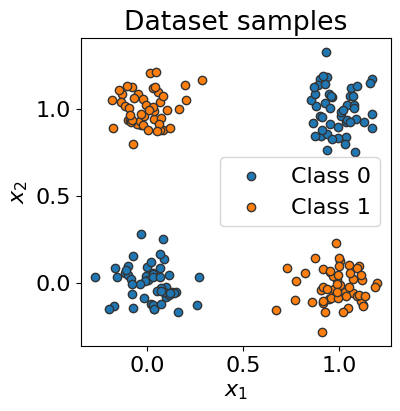

In [67]:
visualize_samples(dataset.data, dataset.label)


---
## Part 18 (1 point)

The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The dataloader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.
In contrast to the dataset class, we usually don't have to define our own dataloader class, but can just create an object of it with the dataset as input.

*   Create a dataloader object called `data_loader` using the options `batch_size=8` and `shuffle=True`.

In [68]:
data_loader = data.DataLoader(dataset,batch_size=8,shuffle=True)

---
## Part 19 (1 point)

*   Get one batch of data from your dataset with your dataloader.  

You can do this with `next(iter(data_loader))`.  This will return two outputs: a set of data and their associated labels (the variables specified in the `__getitem__` function in your dataset class).  Call these variables `data_inputs` and `data_labels`.
*   Print `data_inputs` and `data_labels`.

In [69]:
data_inputs, data_labels = next(iter(data_loader))
print('Data inputs',data_inputs)
print('Data labels',data_labels)

Data inputs tensor([[ 1.1204, -0.1310],
        [ 0.9133,  1.1892],
        [ 0.1481, -0.0562],
        [ 1.0623,  1.1171],
        [ 0.8715,  1.0832],
        [-0.1096,  0.0752],
        [-0.1382,  1.0407],
        [ 0.9129, -0.1063]])
Data labels tensor([1, 0, 0, 0, 0, 0, 1, 1])


---

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch of data from the dataloader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and true labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

---
## Part 20 (1 point)

Next, we need to define a loss function for our classification problem.  Luckily, PyTorch can help us with this too! PyTorch provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list). Here, we'll use the module `nn.BCEWithLogitsLoss`.  The loss function applies a sigmoid to the output and calculates Binary Cross Entropy (BCE) loss, which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$.  In brief, this loss function calculates the similarity between the actual and predicted probabilities of points belonging to each class.
*   Create a `BCEWithLogitsLoss` loss function and call it `loss_module`.



In [70]:
loss_module= nn.BCEWithLogitsLoss()

---
## Part 21 (1 point)

For updating parameters, we can use the PyTorch package `torch.optim`, which has most popular optimizers implemented. We will use one of the most common: `torch.optim.SGD`. **Stochastic Gradient Descent** updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network such as ours is 0.1.
*   Create an optimizer object for SGD with a learning rate of 0.1.  Call this object `optimizer`.  Inputs to the optimizer are the parameters of the model (`model.parameters()`) and any optional settings.




In [71]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

The optimizer provides two useful functions: `optimizer.step()` and `optimizer.zero_grad()`.

The `.step()` function updates the parameters based on the gradients as explained above.

The function `optimizer.zero_grad()` sets the gradients of all parameters to zero.

While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

---
## Part 22 (1 point)
Finally, we are ready to train our model. As a first step, create a larger dataset (2500 data points) and specify a dataloader with a larger batch size (128). Call the dataset `train_dataset` and the dataloader `train_data_loader`.

In [72]:
train_dataset = XORDataset(2500)
train_data_loader = data.DataLoader(train_dataset,batch_size=128,shuffle=True)

---
## Part 23 (1 point)

Now, we can write a small training function. Remember our five steps: load a batch, obtain the predictions, calculate the loss, backpropagate, and update. Additionally, we have to push all data and model parameters to the device of our choice (GPU if available). For the tiny neural network we have, communicating the data to the GPU actually takes much more time than we could save from running the operation on GPU. For large networks, the communication time is significantly smaller than the actual runtime making a GPU crucial in these cases. Still, to practice, we will push the data to GPU here.
*   Push your network (`model`) to your GPU

In [73]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

---
## Part 24 (5 points)

Write a function, `train_model`, to train your model.  This function should be structured as follows:

Inputs: Your model, your optimizer, the dataloader, the loss module, and the number of training epochs, which you can set to a default of 100 (i.e. `..., num_epochs=100):`.

Steps:

1) Set your model to training mode. This is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout), and we can switch between them using `model.train()` and `model.eval()`.

2) Write two nested `for` loops to iterate over the number of training epochs and the contents of the data_loader.  The syntax for the latter will be similar to what you wrote in **Part 19** but should use a `for` loop to iterate over all the training data rather than `next(iter(...))`, which grabs one set of data.  Inside the loops, do the following:

3) Move `data_inputs` and `data_labels` to your device.

4) Run the model on the input data.  Save the output as a variable, `preds`.  Remove singleton dimensions (dimensions of size 1), using a command such as `preds = preds.squeeze(dim=1)`.

5) Use your loss module to calculate the loss according to `preds` and `data_labels`.  You might have to convert the latter to floats using `.float()` for use in your loss module.  Call the loss `loss`.

6) Zero the gradient of your optimizer.

7) Perform backpropogation on `loss` using `.backward()`.

8) Update your parameters using the `.step()` method of your optimizer.

*  Finally call `train_model` with the appropriate inputs.


In [74]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    device = next(model.parameters()).device
    model.train()
    for epoch in range(num_epochs):
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            loss = loss_module(preds.float(), data_labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [76]:
train_model(model, optimizer, data_loader, loss_module)

---
After finish training a model, we can extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [77]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-1.1127, -1.0795],
        [ 3.1382,  2.9255],
        [-3.0345,  1.9031],
        [ 1.9859, -3.0648]], device='cuda:0')), ('linear1.bias', tensor([ 1.6530, -1.0694, -0.6468, -0.7310], device='cuda:0')), ('linear2.weight', tensor([[2.2562, 4.3559, 3.9413, 3.9762]], device='cuda:0')), ('linear2.bias', tensor([-0.0727], device='cuda:0'))])


---
## Part 26 (1 point)


Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consists of randomly generated data points, we can just create more data to use as a test set and create a corresponding dataloader.
*   Just as you did before, create a dataset.  This time, create a dataset with 500 entries and call it `test_dataset`.
*   Create a dataloader, called `test_data_loader` setting `batch_size=128`, `shuffle=False`, and `drop_last=False`.


In [78]:
test_dataset = XORDataset(500)
test_data_loader = data.DataLoader(test_dataset,batch_size=128,shuffle=False,drop_last=False )

---
## Part 27 (2 points)
As metric, we will use accuracy which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.

When evaluating the model, we don't need to keep track of the computation graph as we don't intend to calculate the gradients. This reduces the required memory and speeds up the model. In PyTorch, we can deactivate the computation graph using `with torch.no_grad(): ...`. We also have to set the model to eval mode.
*   Fill in code where indicated below to complete the model evaluation function
*   Run the model evaluation function

In [80]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # FILL IN CODE HERE:  Determine prediction of model on testing data.
            # Send data_inputs and data_labels to your device
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            #vRun your model on the data_inputs and remove singleton dimensions
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # FILL IN CODE HERE: Update running totals of true positives and the number of predictions made
            true_preds += (pred_labels == data_labels).sum().item()
            num_preds += len(data_labels)

    acc = true_preds / num_preds

    print(f"Accuracy of the model: {100.0*acc:4.2f}%")


In [81]:
eval_model(model,data_loader)

Accuracy of the model: 100.00%


If we trained our model correctly, we should see a score close to 100% accuracy. However, this is only possible because of our simple task, and unfortunately, we usually don't get such high scores on test sets of more complex tasks.